In [1]:
import keras
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import *
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import statistics

In [2]:
fold = 0
original = pd.read_csv('AAL_data.csv', header = 0)
original

date   open   high    low    volume  close Name
0      2/8/2013  15.07  15.12  14.63   8407500  14.75  AAL
1     2/11/2013  14.89  15.01  14.26   8882000  14.46  AAL
2     2/12/2013  14.45  14.51  14.10   8126000  14.27  AAL
3     2/13/2013  14.30  14.94  14.25  10259500  14.66  AAL
4     2/14/2013  14.94  14.96  13.16  31879900  13.99  AAL
...         ...    ...    ...    ...       ...    ...  ...
1254   2/1/2018  54.00  54.64  53.59   3623078  53.88  AAL
1255   2/2/2018  53.49  53.99  52.03   5109361  52.10  AAL
1256   2/5/2018  51.99  52.39  49.75   6878284  49.76  AAL
1257   2/6/2018  49.32  51.50  48.79   6782480  51.18  AAL
1258   2/7/2018  50.91  51.98  50.89   4845831  51.40  AAL

[1259 rows x 7 columns]

In [3]:
# convert series to supervised learning
def series_to_supervised(data, ninput, noutput):
    
    size = 1
    if type(data) is list:
        size = 1
    else: 
        size = data.shape[1]
        
    df = DataFrame(data)
    features = list()
    feature_names = list()
    
    # input sequence (t-n, ... t-1)
    for i in range(ninput, 0, -1):
        features.append(df.shift(i))
        feature_names = feature_names + [('var%d(t-%d)' % (j+1, i)) for j in range(size)]
        
    # output sequence (t, t+1, ... t+n)
    for i in range(0, noutput):
        features.append(df.shift(-i))
        if i == 0:
            feature_names = feature_names + [('var%d(t)' % (j+1)) for j in range(size)]
        else:
            feature_names = feature_names + [('var%d(t+%d)' % (j+1, i)) for j in range(size)]
            
    final = concat(features, axis=1)
    final.columns = feature_names
    final.dropna(inplace=True)
    
    return final

In [4]:
def crossValidation(original, bs, choice):
    
    train_rows = (int)(len(original)*0.8)
    length = int(train_rows/10)
    
    # The folds are set at these specific intervals to ensure a degree of sameness across the models.\
    # These folds are the validation set
    
    X1 = original.iloc[0:length, :]
    X2 = original.iloc[length:length*2, :]
    X3 = original.iloc[length*2:length*3, :]
    X4 = original.iloc[length*3:length*4, :]
    X5 = original.iloc[length*4:length*5, :]
    X6 = original.iloc[length*5:length*6, :]
    X7 = original.iloc[length*6:length*7, :]
    X8 = original.iloc[length*7:length*8, :]
    X9 = original.iloc[length*8:length*9, :]
    X10 = original.iloc[length*9:train_rows, :]
    
    # These folds are the training sets for their respective validation sets
    
    fold2 = []
    
    for i in range(0, length):
        fold2.append(i)
        
    for i in range(length*2, train_rows):
        fold2.append(i)
    
    fold3 = []
    
    for i in range(0, length*2):
        fold3.append(i)
        
    for i in range(length*3, train_rows):
        fold3.append(i)
    
    fold4 = []
    
    for i in range(0, length*3):
        fold4.append(i)
        
    for i in range(length*4, train_rows):
        fold4.append(i)
    
    fold5 = []
    
    for i in range(0, length*4):
        fold5.append(i)
        
    for i in range(length*5, train_rows):
        fold5.append(i)
    
    fold6 = []
    
    for i in range(0, length*5):
        fold6.append(i)
        
    for i in range(length*6, train_rows):
        fold6.append(i)
    
    fold7 = []
    
    for i in range(0, length*6):
        fold7.append(i)
        
    for i in range(length*7, train_rows):
        fold7.append(i)
    
    fold8 = []
    
    for i in range(0, length*7):
        fold8.append(i)
        
    for i in range(length*8, train_rows):
        fold8.append(i)
    
    fold9 = []
    
    for i in range(0, length*8):
        fold9.append(i)
        
    for i in range(length*9, train_rows):
        fold9.append(i)
    
    X11 = original.iloc[length*2:train_rows, :]
    X22 = original.iloc[fold2, :]
    X33 = original.iloc[fold3, :]
    X44 = original.iloc[fold4, :]
    X55 = original.iloc[fold5, :]
    X66 = original.iloc[fold6, :]
    X77 = original.iloc[fold7, :]
    X88 = original.iloc[fold8, :]
    X99 = original.iloc[fold9, :]
    X100 = original.iloc[0:length*9, :]
    
    
    # Choice of "1" implements 10-fold cross validation for RNN
    
    if(choice == 1):
        great = 0.0
        gm = 0
        
        # load dataset
        dataset = X11
        dataset2 = X1
        values = dataset.values
        values2 = dataset2.values

        # normalize dataset
        s = MinMaxScaler(feature_range=(0, 1))
        ndataset = s.fit_transform(values)
        ndataset2 = s.fit_transform(values2)

        # convert series to supervised learning
        pdataset = series_to_supervised(ndataset, 1, 1)
        pdataset2 = series_to_supervised(ndataset2, 1, 1)

        # drop columns we don't want to predict
        pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
        pdataset2.drop(pdataset2.columns[[6,7,8,9,10]], axis=1, inplace=True)
        #print(pdataset.head())
        #print(pdataset2.head())

        # split into 80% training set and 20% testing set
        values = pdataset.values
        values2 = pdataset.values
        train = values[:, :]
        test = values2[:, :]

        # split into input and output sets
        train_X = train[:, :6]
        train_y = train[:, 5]
        test_X = test[:, :6]
        test_y = test[:, 5]
        

        # reshape input to 3D
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

        # define RNN model
        rnn1 = Sequential()
        rnn1.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
        rnn1.add(Dense(1))
        rnn1.compile(loss='mae', optimizer='adam')

        # fit model
        print("Fold 1")
        rnn1.fit(train_X, train_y, epochs=100, batch_size=bs, shuffle=False)

        # make a prediction
        pred_y = rnn1.predict(test_X)
        
        # calculate RMSE
        f1 = np.sqrt(metrics.mean_squared_error(test_y, pred_y))
        
        if f1>great:
            great = f1
            gm = 1
            
        # load dataset
        dataset = X22
        dataset2 = X2
        values = dataset.values
        values2 = dataset2.values

        # normalize dataset
        s = MinMaxScaler(feature_range=(0, 1))
        ndataset = s.fit_transform(values)
        ndataset2 = s.fit_transform(values2)

        # convert series to supervised learning
        pdataset = series_to_supervised(ndataset, 1, 1)
        pdataset2 = series_to_supervised(ndataset2, 1, 1)

        # drop columns we don't want to predict
        pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
        pdataset2.drop(pdataset2.columns[[6,7,8,9,10]], axis=1, inplace=True)
        #print(pdataset.head())
        #print(pdataset2.head())

        # split into 80% training set and 20% testing set
        values = pdataset.values
        values2 = pdataset.values
        train = values[:, :]
        test = values2[:, :]

        # split into input and output sets
        train_X = train[:, :6]
        train_y = train[:, 5]
        test_X = test[:, :6]
        test_y = test[:, 5]
        

        # reshape input to 3D
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

        # define RNN model
        rnn2 = Sequential()
        rnn2.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
        rnn2.add(Dense(1))
        rnn2.compile(loss='mae', optimizer='adam')

        # fit model
        print("Fold 2")
        rnn2.fit(train_X, train_y, epochs=100, batch_size=bs, shuffle=False)

        # make a prediction
        pred_y = rnn2.predict(test_X)
        
        # calculate RMSE
        f2 = np.sqrt(metrics.mean_squared_error(test_y, pred_y))
        
        if f2<great:
            great = f2
            gm = 2
            
        # load dataset
        dataset = X33
        dataset2 = X3
        values = dataset.values
        values2 = dataset2.values

        # normalize dataset
        s = MinMaxScaler(feature_range=(0, 1))
        ndataset = s.fit_transform(values)
        ndataset2 = s.fit_transform(values2)

        # convert series to supervised learning
        pdataset = series_to_supervised(ndataset, 1, 1)
        pdataset2 = series_to_supervised(ndataset2, 1, 1)

        # drop columns we don't want to predict
        pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
        pdataset2.drop(pdataset2.columns[[6,7,8,9,10]], axis=1, inplace=True)
        #print(pdataset.head())
        #print(pdataset2.head())

        # split into 80% training set and 20% testing set
        values = pdataset.values
        values2 = pdataset.values
        train = values[:, :]
        test = values2[:, :]

        # split into input and output sets
        train_X = train[:, :6]
        train_y = train[:, 5]
        test_X = test[:, :6]
        test_y = test[:, 5]
        

        # reshape input to 3D
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

        # define RNN model
        rnn3 = Sequential()
        rnn3.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
        rnn3.add(Dense(1))
        rnn3.compile(loss='mae', optimizer='adam')

        # fit model
        print("Fold 3")
        rnn3.fit(train_X, train_y, epochs=100, batch_size=bs, shuffle=False)

        # make a prediction
        pred_y = rnn3.predict(test_X)
        
        # calculate RMSE
        f3 = np.sqrt(metrics.mean_squared_error(test_y, pred_y))
        
        if f3<great:
            great = f3
            gm = 3
            
        # load dataset
        dataset = X44
        dataset2 = X4
        values = dataset.values
        values2 = dataset2.values

        # normalize dataset
        s = MinMaxScaler(feature_range=(0, 1))
        ndataset = s.fit_transform(values)
        ndataset2 = s.fit_transform(values2)

        # convert series to supervised learning
        pdataset = series_to_supervised(ndataset, 1, 1)
        pdataset2 = series_to_supervised(ndataset2, 1, 1)

        # drop columns we don't want to predict
        pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
        pdataset2.drop(pdataset2.columns[[6,7,8,9,10]], axis=1, inplace=True)
        #print(pdataset.head())
        #print(pdataset2.head())

        # split into 80% training set and 20% testing set
        values = pdataset.values
        values2 = pdataset.values
        train = values[:, :]
        test = values2[:, :]

        # split into input and output sets
        train_X = train[:, :6]
        train_y = train[:, 5]
        test_X = test[:, :6]
        test_y = test[:, 5]
        

        # reshape input to 3D
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

        # define RNN model
        rnn4 = Sequential()
        rnn4.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
        rnn4.add(Dense(1))
        rnn4.compile(loss='mae', optimizer='adam')

        # fit model
        print("Fold 4")
        rnn4.fit(train_X, train_y, epochs=100, batch_size=bs, shuffle=False)

        # make a prediction
        pred_y = rnn4.predict(test_X)
        
        # calculate RMSE
        f4 = np.sqrt(metrics.mean_squared_error(test_y, pred_y))
        
        if f4<great:
            great = f4
            gm = 4
            
        # load dataset
        dataset = X55
        dataset2 = X5
        values = dataset.values
        values2 = dataset2.values

        # normalize dataset
        s = MinMaxScaler(feature_range=(0, 1))
        ndataset = s.fit_transform(values)
        ndataset2 = s.fit_transform(values2)

        # convert series to supervised learning
        pdataset = series_to_supervised(ndataset, 1, 1)
        pdataset2 = series_to_supervised(ndataset2, 1, 1)

        # drop columns we don't want to predict
        pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
        pdataset2.drop(pdataset2.columns[[6,7,8,9,10]], axis=1, inplace=True)
        #print(pdataset.head())
        #print(pdataset2.head())

        # split into 80% training set and 20% testing set
        values = pdataset.values
        values2 = pdataset.values
        train = values[:, :]
        test = values2[:, :]

        # split into input and output sets
        train_X = train[:, :6]
        train_y = train[:, 5]
        test_X = test[:, :6]
        test_y = test[:, 5]
        

        # reshape input to 3D
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

        # define RNN model
        rnn5 = Sequential()
        rnn5.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
        rnn5.add(Dense(1))
        rnn5.compile(loss='mae', optimizer='adam')

        # fit model
        print("Fold 5")
        rnn5.fit(train_X, train_y, epochs=100, batch_size=bs, shuffle=False)

        # make a prediction
        pred_y = rnn5.predict(test_X)
        
        # calculate RMSE
        f5 = np.sqrt(metrics.mean_squared_error(test_y, pred_y))
        
        if f5<great:
            great = f5
            gm = 5
            
        # load dataset
        dataset = X66
        dataset2 = X6
        values = dataset.values
        values2 = dataset2.values

        # normalize dataset
        s = MinMaxScaler(feature_range=(0, 1))
        ndataset = s.fit_transform(values)
        ndataset2 = s.fit_transform(values2)

        # convert series to supervised learning
        pdataset = series_to_supervised(ndataset, 1, 1)
        pdataset2 = series_to_supervised(ndataset2, 1, 1)

        # drop columns we don't want to predict
        pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
        pdataset2.drop(pdataset2.columns[[6,7,8,9,10]], axis=1, inplace=True)
        #print(pdataset.head())
        #print(pdataset2.head())

        # split into 80% training set and 20% testing set
        values = pdataset.values
        values2 = pdataset.values
        train = values[:, :]
        test = values2[:, :]

        # split into input and output sets
        train_X = train[:, :6]
        train_y = train[:, 5]
        test_X = test[:, :6]
        test_y = test[:, 5]
        

        # reshape input to 3D
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

        # define RNN model
        rnn6 = Sequential()
        rnn6.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
        rnn6.add(Dense(1))
        rnn6.compile(loss='mae', optimizer='adam')

        # fit model
        print("Fold 6")
        rnn6.fit(train_X, train_y, epochs=100, batch_size=bs, shuffle=False)

        # make a prediction
        pred_y = rnn6.predict(test_X)
        
        # calculate RMSE
        f6 = np.sqrt(metrics.mean_squared_error(test_y, pred_y))
        
        if f6<great:
            great = f6
            gm = 6
            
        # load dataset
        dataset = X77
        dataset2 = X7
        values = dataset.values
        values2 = dataset2.values

        # normalize dataset
        s = MinMaxScaler(feature_range=(0, 1))
        ndataset = s.fit_transform(values)
        ndataset2 = s.fit_transform(values2)

        # convert series to supervised learning
        pdataset = series_to_supervised(ndataset, 1, 1)
        pdataset2 = series_to_supervised(ndataset2, 1, 1)

        # drop columns we don't want to predict
        pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
        pdataset2.drop(pdataset2.columns[[6,7,8,9,10]], axis=1, inplace=True)
        #print(pdataset.head())
        #print(pdataset2.head())

        # split into 80% training set and 20% testing set
        values = pdataset.values
        values2 = pdataset.values
        train = values[:, :]
        test = values2[:, :]

        # split into input and output sets
        train_X = train[:, :6]
        train_y = train[:, 5]
        test_X = test[:, :6]
        test_y = test[:, 5]
        

        # reshape input to 3D
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

        # define RNN model
        rnn7 = Sequential()
        rnn7.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
        rnn7.add(Dense(1))
        rnn7.compile(loss='mae', optimizer='adam')

        # fit model
        print("Fold 7")
        rnn7.fit(train_X, train_y, epochs=100, batch_size=bs, shuffle=False)

        # make a prediction
        pred_y = rnn7.predict(test_X)
        
        # calculate RMSE
        f7 = np.sqrt(metrics.mean_squared_error(test_y, pred_y))
        
        if f7<great:
            great = f7
            gm = 7
            
        # load dataset
        dataset = X88
        dataset2 = X8
        values = dataset.values
        values2 = dataset2.values

        # normalize dataset
        s = MinMaxScaler(feature_range=(0, 1))
        ndataset = s.fit_transform(values)
        ndataset2 = s.fit_transform(values2)

        # convert series to supervised learning
        pdataset = series_to_supervised(ndataset, 1, 1)
        pdataset2 = series_to_supervised(ndataset2, 1, 1)

        # drop columns we don't want to predict
        pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
        pdataset2.drop(pdataset2.columns[[6,7,8,9,10]], axis=1, inplace=True)
        #print(pdataset.head())
        #print(pdataset2.head())

        # split into 80% training set and 20% testing set
        values = pdataset.values
        values2 = pdataset.values
        train = values[:, :]
        test = values2[:, :]

        # split into input and output sets
        train_X = train[:, :6]
        train_y = train[:, 5]
        test_X = test[:, :6]
        test_y = test[:, 5]
        

        # reshape input to 3D
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

        # define RNN model
        rnn8 = Sequential()
        rnn8.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
        rnn8.add(Dense(1))
        rnn8.compile(loss='mae', optimizer='adam')

        # fit model
        print("Fold 8")
        rnn8.fit(train_X, train_y, epochs=100, batch_size=bs, shuffle=False)

        # make a prediction
        pred_y = rnn8.predict(test_X)
        
        # calculate RMSE
        f8 = np.sqrt(metrics.mean_squared_error(test_y, pred_y))
        
        if f8<great:
            great = f8
            gm = 8
            
        # load dataset
        dataset = X99
        dataset2 = X9
        values = dataset.values
        values2 = dataset2.values

        # normalize dataset
        s = MinMaxScaler(feature_range=(0, 1))
        ndataset = s.fit_transform(values)
        ndataset2 = s.fit_transform(values2)

        # convert series to supervised learning
        pdataset = series_to_supervised(ndataset, 1, 1)
        pdataset2 = series_to_supervised(ndataset2, 1, 1)

        # drop columns we don't want to predict
        pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
        pdataset2.drop(pdataset2.columns[[6,7,8,9,10]], axis=1, inplace=True)
        #print(pdataset.head())
        #print(pdataset2.head())

        # split into 80% training set and 20% testing set
        values = pdataset.values
        values2 = pdataset.values
        train = values[:, :]
        test = values2[:, :]

        # split into input and output sets
        train_X = train[:, :6]
        train_y = train[:, 5]
        test_X = test[:, :6]
        test_y = test[:, 5]
        

        # reshape input to 3D
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

        # define RNN model
        rnn9 = Sequential()
        rnn9.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
        rnn9.add(Dense(1))
        rnn9.compile(loss='mae', optimizer='adam')

        # fit model
        print("Fold 9")
        rnn9.fit(train_X, train_y, epochs=100, batch_size=bs, shuffle=False)

        # make a prediction
        pred_y = rnn9.predict(test_X)
        
        # calculate RMSE
        f9 = np.sqrt(metrics.mean_squared_error(test_y, pred_y))
        
        if f9<great:
            great = f9
            gm = 9
            
        # load dataset
        dataset = X100
        dataset2 = X10
        values = dataset.values
        values2 = dataset2.values

        # normalize dataset
        s = MinMaxScaler(feature_range=(0, 1))
        ndataset = s.fit_transform(values)
        ndataset2 = s.fit_transform(values2)

        # convert series to supervised learning
        pdataset = series_to_supervised(ndataset, 1, 1)
        pdataset2 = series_to_supervised(ndataset2, 1, 1)

        # drop columns we don't want to predict
        pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
        pdataset2.drop(pdataset2.columns[[6,7,8,9,10]], axis=1, inplace=True)
        #print(pdataset.head())
        #print(pdataset2.head())

        # split into 80% training set and 20% testing set
        values = pdataset.values
        values2 = pdataset.values
        train = values[:, :]
        test = values2[:, :]

        # split into input and output sets
        train_X = train[:, :6]
        train_y = train[:, 5]
        test_X = test[:, :6]
        test_y = test[:, 5]
        

        # reshape input to 3D
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

        # define RNN model
        rnn10 = Sequential()
        rnn10.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
        rnn10.add(Dense(1))
        rnn10.compile(loss='mae', optimizer='adam')

        # fit model
        print("Fold 10")
        rnn10.fit(train_X, train_y, epochs=100, batch_size=bs, shuffle=False)

        # make a prediction
        pred_y = rnn10.predict(test_X)
        
        # calculate RMSE
        f10 = np.sqrt(metrics.mean_squared_error(test_y, pred_y))
        
        if f10<great:
            great = f10
            gm = 10
            
        # load dataset
        dataset = original
        values = dataset.values

        # normalize dataset
        s = MinMaxScaler(feature_range=(0, 1))
        ndataset = s.fit_transform(values)

        # convert series to supervised learning
        pdataset = series_to_supervised(ndataset, 1, 1)

        # drop columns we don't want to predict
        pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
        #print(pdataset.head())

        # split into 80% training set and 20% testing set
        values = pdataset.values
        train_len = (int)(len(original)*0.8)
        train = values[:train_len, :]
        test = values[train_len:, :]

        # split into input and output sets
        train_X = train[:, :6]
        train_y = train[:, 5]
        test_X = test[:, :6]
        test_y = test[:, 5]

        # reshape input to 3D
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

        # define RNN model
        rnn11 = Sequential()
        rnn11.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
        rnn11.add(Dense(1))
        rnn11.compile(loss='mae', optimizer='adam')

        # fit model
        print("No Fold")
        rnn11.fit(train_X, train_y, epochs=100, batch_size=bs, shuffle=False)

        # make a prediction
        pred_y = rnn11.predict(test_X)
        
        # calculate RMSE
        f11 = np.sqrt(metrics.mean_squared_error(test_y, pred_y))
        
        if f11<great:
            great = f11
            gm = 11
            
        
        global fold
            
        print("Fold 1:",f1)
        print("Fold 2:",f2)
        print("Fold 3:",f3)
        print("Fold 4:",f4)
        print("Fold 5:",f5)
        print("Fold 6:",f6)
        print("Fold 7:",f7)
        print("Fold 8:",f8)
        print("Fold 9:",f9)
        print("Fold 10:",f10)
        print("No Fold:",f11)
              
        if(gm==1):
            fold = 1
            return rnn1
        if(gm==2):
            fold = 2
            return rnn2
        if(gm==3):
            fold = 3
            return rnn3
        if(gm==4):
            fold = 4
            return rnn4
        if(gm==5):
            fold = 5
            return rnn5
        if(gm==6):
            fold = 6
            return rnn6
        if(gm==7):
            fold = 7
            return rnn7
        if(gm==8):
            fold = 8
            return rnn8
        if(gm==9):
            fold = 9
            return rnn9
        if(gm==10):
            fold = 10
            return rnn10
        if(gm==11):
            fold = 11
            return rnn11

American Airlines (AAL)
Fold 1
Epoch 1/100
4/4 [==============================] - 12s 2ms/step - loss: 0.5091
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4707
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4323
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3933
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3537
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3130
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2713
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2288
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1863
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1446
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1068
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0764
Epoch 13/100
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.4042
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3640
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3233
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2836
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2451
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2062
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1660
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1253
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0895
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0651
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0638
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0678
Epoch 15/100
4/4 [==============================] - 0s 3ms/step - loss:

4/4 [==============================] - 0s 2ms/step - loss: 0.2493
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2162
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1848
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1543
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1247
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0990
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0804
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0759
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0765
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0735
Epoch 16/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - lo

4/4 [==============================] - 0s 2ms/step - loss: 0.1819
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1555
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1293
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1044
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0824
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0684
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0725
Epoch 16/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0768
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0713
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0647
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0643
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0631
Epoch 21/100
4/4 [==============================] - 0s 2ms/step -

4/4 [==============================] - 0s 2ms/step - loss: 0.0870
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0794
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0827
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0831
Epoch 16/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0779
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0753
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0749
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0736
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0711
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0683
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0644
Epoch 24/100
4/4 [==============================] - 0s 2ms/step -

4/4 [==============================] - 0s 2ms/step - loss: 0.0789
Epoch 16/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0731
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0712
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0698
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0647
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0606
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 24/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0568
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 26/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0525
Epoch 27/100
4/4 [==============================] - 0s 2ms/step -

4/4 [==============================] - 0s 2ms/step - loss: 0.0906
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0855
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0806
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0790
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0773
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0746
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0716
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0694
Epoch 26/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 27/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0657
Epoch 28/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0636
Epoch 29/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0615
Epoch 30/100
4/4 [==============================] - 0s 2ms/step -

4/4 [==============================] - 0s 2ms/step - loss: 0.0647
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0625
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0607
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0564
Epoch 26/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0542
Epoch 27/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0519
Epoch 28/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 29/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0472
Epoch 30/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0449
Epoch 31/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0427
Epoch 32/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0405
Epoch 33/100
4/4 [==============================] - 0s 3ms/step -

4/4 [==============================] - 0s 2ms/step - loss: 0.0459
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0441
Epoch 26/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0423
Epoch 27/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0408
Epoch 28/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0394
Epoch 29/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 30/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0366
Epoch 31/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 32/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0335
Epoch 33/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0320
Epoch 34/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 35/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 36/100
4/4 [==============================] - 0s 2ms/step -

4/4 [==============================] - 0s 2ms/step - loss: 0.0594
Epoch 28/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0577
Epoch 29/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0560
Epoch 30/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 31/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 32/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0510
Epoch 33/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0492
Epoch 34/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 35/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0456
Epoch 36/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0438
Epoch 37/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0419
Epoch 38/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0402
Epoch 39/100
4/4 [==============================] - 0s 2ms/step -

5/5 [==============================] - 0s 2ms/step - loss: 0.0510
Epoch 31/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0497
Epoch 32/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 33/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0456
Epoch 34/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0442
Epoch 35/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0421
Epoch 36/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0404
Epoch 37/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0383
Epoch 38/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 39/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0348
Epoch 40/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 41/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0312
Epoch 42/100
5/5 [==============================] - 0s 2ms/step -

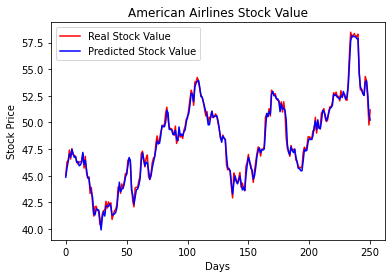

RMSE using RNN: 0.3639851339
Mean Absolute Error using RNN: 0.2743631960
Standard Deviation using RNN: 0.3521474209
Fold 8
Wall time: 44.4 s


In [5]:
%%time
print("American Airlines (AAL)")

# modify dataset
original = pd.read_csv('AAL_data.csv', header = 0)
original['date']= pd.to_datetime(original['date'])
original['date']= pd.to_numeric(original['date'])
original.drop(['Name'], axis = 1, inplace = True)

# load dataset
dataset = original
values = dataset.values

# normalize dataset
s = MinMaxScaler(feature_range=(0, 1))
ndataset = s.fit_transform(values)

# convert series to supervised learning
pdataset = series_to_supervised(ndataset, 1, 1)

# drop columns we don't want to predict
pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
#print(pdataset.head())
 
# split into 80% training set and 20% testing set
values = pdataset.values
train_len = (int)(len(original)*0.8)
train = values[:train_len, :]
test = values[train_len:, :]

# split into input and output sets
train_X = train[:, :6]
train_y = train[:, 5]
test_X = test[:, :6]
test_y = test[:, 5]

# reshape input to 3D
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# define RNN model
rnn = crossValidation(original, 250, 1)
 
# make a prediction
pred_y = rnn.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# inverse scaling
pred_y = concatenate((test_X[:, :5], pred_y), axis=1)
pred_y = s.inverse_transform(pred_y)
pred_y = pred_y[:,5]

# actual stock values
true_y = original.iloc[train_len:len(original)-1, 5]
true_y = true_y.reset_index(drop=True)

plot.plot(true_y, color = 'red', label = 'Real Stock Value')
plot.plot(pred_y, color = 'blue', label = 'Predicted Stock Value')
plot.title('American Airlines Stock Value')
plot.xlabel('Days')
plot.ylabel('Stock Price')
plot.legend()
plot.show()

# Calculate Metrics
rmse = np.sqrt(metrics.mean_squared_error(true_y, pred_y))
mae = (metrics.mean_absolute_error(true_y, pred_y))

mean_a = statistics.mean(true_y)
mean_b = statistics.mean(pred_y)

stdev_a = statistics.stdev(true_y)
stdev_b = statistics.stdev(pred_y)

cov = 0
for i in range(len(true_y)):
    cov = cov + ((true_y[i]-mean_a)*(pred_y[i]-mean_b))/(len(true_y)-1)
    
cov = 2*cov

stdev = np.sqrt((stdev_a*stdev_a)+(stdev_b*stdev_b)-cov)

print('RMSE using RNN: %.10f' % rmse)
print('Mean Absolute Error using RNN: %.10f' % mae)
print('Standard Deviation using RNN: %.10f' % stdev)
print("Fold",fold)

In [6]:
%%time
print("Apple (AAPL)")

# modify dataset
original = pd.read_csv('AAPL_data.csv', header = 0)
original['date']= pd.to_datetime(original['date'])
original['date']= pd.to_numeric(original['date'])
original.drop(['Name'], axis = 1, inplace = True)

# load dataset
dataset = original
values = dataset.values

# normalize dataset
s = MinMaxScaler(feature_range=(0, 1))
ndataset = s.fit_transform(values)

# convert series to supervised learning
pdataset = series_to_supervised(ndataset, 1, 1)

# drop columns we don't want to predict
pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
print(pdataset.head())
 
# split into 80% training set and 20% testing set
values = pdataset.values
train_len = (int)(len(original)*0.8)
train = values[:train_len, :]
test = values[train_len:, :]

# split into input and output sets
train_X = train[:, :6]
train_y = train[:, 5]
test_X = test[:, :6]
test_y = test[:, 5]

# reshape input to 3D
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# define RNN model
rnn = crossValidation(original, 100, 1)
 
# make a prediction
pred_y = rnn.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# inverse scaling
pred_y = concatenate((test_X[:, :5], pred_y), axis=1)
pred_y = s.inverse_transform(pred_y)
pred_y = pred_y[:,5]

# actual stock values
true_y = original.iloc[train_len:len(original)-1, 5]
true_y = true_y.reset_index(drop=True)

plot.plot(true_y, color = 'red', label = 'Real Stock Value')
plot.plot(pred_y, color = 'blue', label = 'Predicted Stock Value')
plot.title('Apple Stock Value')
plot.xlabel('Days')
plot.ylabel('Stock Price')
plot.legend()
plot.show()

# Calculate Metrics
rmse = np.sqrt(metrics.mean_squared_error(true_y, pred_y))
mae = (metrics.mean_absolute_error(true_y, pred_y))

mean_a = statistics.mean(true_y)
mean_b = statistics.mean(pred_y)

stdev_a = statistics.stdev(true_y)
stdev_b = statistics.stdev(pred_y)

cov = 0
for i in range(len(true_y)):
    cov = cov + ((true_y[i]-mean_a)*(pred_y[i]-mean_b))/(len(true_y)-1)
    
cov = 2*cov

stdev = np.sqrt((stdev_a*stdev_a)+(stdev_b*stdev_b)-cov)

print('RMSE using RNN: %.10f' % rmse)
print('Mean Absolute Error using RNN: %.10f' % mae)
print('Standard Deviation using RNN: %.10f' % stdev)
print("Fold",fold)

Apple (AAPL)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var6(t)
1   0.000000   0.099156   0.091987   0.096389   0.574459   0.097710  0.103438
2   0.001644   0.102038   0.099106   0.102185   0.460348   0.103438  0.089519
3   0.002192   0.105507   0.096133   0.095803   0.549635   0.089519  0.088489
4   0.002740   0.091330   0.085983   0.090558   0.419984   0.088489  0.088003
5   0.003288   0.088230   0.083660   0.091486   0.302843   0.088003  0.080564
Fold 1
Epoch 1/100
9/9 [==============================] - 2s 2ms/step - loss: 0.4233
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.3471
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2764
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2154
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1581
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1118
Epoch 7/100
9/9 [===========================

9/9 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 99/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 100/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0089
Fold 2
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.3546
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2655
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1809
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1085
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0798
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0913
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0816
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0732
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 10/100
10/10 [============================

10/10 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0091
Fold 3
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.3399
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2593
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1969
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1446
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1032
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1079
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1044
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0909
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0813
Epoch 10/100
10/10 [======================

10/10 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 100/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0067
Fold 4
Epoch 1/100
10/10 [==============================] - 2s 2ms/step - loss: 0.3619
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2768
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2006
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1441
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1077
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0983
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1048
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0945
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0838
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0759
Epoch 11/100
10/10 [======================

10/10 [==============================] - 0s 1ms/step - loss: 0.0072
Fold 5
Epoch 1/100
10/10 [==============================] - 1s 1ms/step - loss: 0.3153
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2293
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1518
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0979
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0828
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0954
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0884
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0741
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0642
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0573
Epoch 11/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0498
Epoch 12/100
10/10 [=======================

10/10 [==============================] - 1s 1ms/step - loss: 0.3503
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2720
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1976
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1368
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0920
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0821
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0952
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0853
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0736
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0668
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 12/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0538
Epoch 13/100
10/10 [=============================

10/10 [==============================] - 0s 1ms/step - loss: 0.2342
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1571
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1006
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0759
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0957
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0880
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0695
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0604
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0540
Epoch 11/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0441
Epoch 12/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0367
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0303
Epoch 14/100
10/10 [============================

10/10 [==============================] - 0s 1ms/step - loss: 0.1278
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0839
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0808
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0899
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0780
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0595
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0531
Epoch 11/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0466
Epoch 12/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0390
Epoch 13/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0342
Epoch 14/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0290
Epoch 15/100
10/10 [===========================

10/10 [==============================] - 0s 2ms/step - loss: 0.1769
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1330
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1094
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1079
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1183
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1042
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0898
Epoch 11/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0829
Epoch 12/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0738
Epoch 13/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0643
Epoch 14/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0575
Epoch 15/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0491
Epoch 16/100
10/10 [==========================

9/9 [==============================] - 0s 2ms/step - loss: 0.0979
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1005
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1070
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0969
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0842
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0737
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 12/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0577
Epoch 13/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 14/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0409
Epoch 15/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0324
Epoch 16/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 17/100
9/9 [==============================] - 0s 2ms/step - los

11/11 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 9/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0497
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0428
Epoch 11/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 12/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0295
Epoch 13/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 14/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 15/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 16/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 17/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0158
Epoch 18/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 19/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 20/100
11/11 [======================

RMSE using RNN: 0.7047160665
Mean Absolute Error using RNN: 0.4927897299
Standard Deviation using RNN: 0.6906932377
Fold 5
Wall time: 41 s


Boeing (BA)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var6(t)
1   0.000000   0.008922   0.007703   0.007236   0.098884   0.006766  0.004322
2   0.001644   0.006053   0.004367   0.005688   0.066239   0.004322  0.004747
3   0.002192   0.004793   0.003703   0.005616   0.064414   0.004747  0.000461
4   0.002740   0.003429   0.002236   0.001278   0.080835   0.000461  0.000992
5   0.003288   0.000000   0.000419   0.000972   0.069755   0.000992  0.001346
Fold 1
Epoch 1/100
17/17 [==============================] - 1s 1ms/step - loss: 0.3803
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 0.2199
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0890
Epoch 4/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0670
Epoch 5/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0586
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0541
Epoch 7/100
17/17 [==============

17/17 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 97/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 98/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 99/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 100/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0077
Fold 2
Epoch 1/100
19/19 [==============================] - 1s 1ms/step - loss: 0.3576
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.1707
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0613
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0610
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0522
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0510
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0484
Epoch 8/100
19/19 [=====================

19/19 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 98/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 99/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 100/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0100
Fold 3
Epoch 1/100
19/19 [==============================] - 1s 1ms/step - loss: 0.3256
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.1499
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0504
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0522
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0450
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0421
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0384
Epoch 8/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0356
Epoch 9/100
19/19 [======================

19/19 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 99/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 100/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0127
Fold 4
Epoch 1/100
19/19 [==============================] - 2s 1ms/step - loss: 0.4216
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.2558
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0971
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0698
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0660
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0580
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0537
Epoch 8/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0495
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0460
Epoch 10/100
19/19 [======================

19/19 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 100/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0160
Fold 5
Epoch 1/100
19/19 [==============================] - 1s 1ms/step - loss: 0.4345
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.2593
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0992
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0677
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0691
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0624
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0604
Epoch 8/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0562
Epoch 9/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0530
Epoch 10/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0493
Epoch 11/100
19/19 [======================

19/19 [==============================] - 0s 1ms/step - loss: 0.0157
Fold 6
Epoch 1/100
19/19 [==============================] - 1s 1ms/step - loss: 0.3784
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.2036
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0596
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0638
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0591
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0530
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0504
Epoch 8/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0435
Epoch 9/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0419
Epoch 10/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0367
Epoch 11/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 12/100
19/19 [=======================

19/19 [==============================] - 2s 2ms/step - loss: 0.4035
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2560
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1040
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0632
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0577
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0440
Epoch 11/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0422
Epoch 12/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0398
Epoch 13/100
19/19 [=============================

19/19 [==============================] - 0s 1ms/step - loss: 0.2757
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0993
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0784
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0624
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0581
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0516
Epoch 8/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0475
Epoch 9/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0456
Epoch 10/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0464
Epoch 11/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0431
Epoch 12/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0413
Epoch 13/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0396
Epoch 14/100
19/19 [============================

19/19 [==============================] - 0s 1ms/step - loss: 0.0585
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0636
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0553
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0514
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0484
Epoch 8/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0476
Epoch 9/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0445
Epoch 10/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0428
Epoch 11/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0403
Epoch 12/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0376
Epoch 13/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 14/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 15/100
19/19 [===========================

18/18 [==============================] - 0s 1ms/step - loss: 0.0677
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0730
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0657
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0631
Epoch 8/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0585
Epoch 9/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0556
Epoch 10/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0510
Epoch 11/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0486
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 13/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0428
Epoch 14/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0380
Epoch 15/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0373
Epoch 16/100
18/18 [==========================

21/21 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0240
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0190
Epoch 11/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0170
Epoch 12/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 13/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 14/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 15/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 16/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 17/100
21/21 [=========================

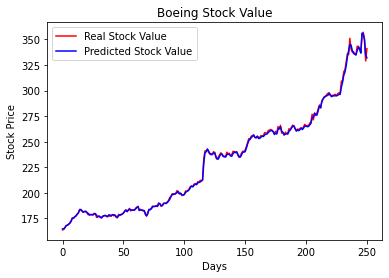

RMSE using RNN: 1.4622531929
Mean Absolute Error using RNN: 0.9798593661
Standard Deviation using RNN: 1.3699300920
Fold 8
Wall time: 53.9 s


In [7]:
%%time
print("Boeing (BA)")

# modify dataset
original = pd.read_csv('BA_data.csv', header = 0)
original['date']= pd.to_datetime(original['date'])
original['date']= pd.to_numeric(original['date'])
original.drop(['Name'], axis = 1, inplace = True)

# load dataset
dataset = original
values = dataset.values

# normalize dataset
s = MinMaxScaler(feature_range=(0, 1))
ndataset = s.fit_transform(values)

# convert series to supervised learning
pdataset = series_to_supervised(ndataset, 1, 1)

# drop columns we don't want to predict
pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
print(pdataset.head())
 
# split into 80% training set and 20% testing set
values = pdataset.values
train_len = (int)(len(original)*0.8)
train = values[:train_len, :]
test = values[train_len:, :]

# split into input and output sets
train_X = train[:, :6]
train_y = train[:, 5]
test_X = test[:, :6]
test_y = test[:, 5]

# reshape input to 3D
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# define RNN model
rnn = crossValidation(original, 50, 1)
 
# make a prediction
pred_y = rnn.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# inverse scaling
pred_y = concatenate((test_X[:, :5], pred_y), axis=1)
pred_y = s.inverse_transform(pred_y)
pred_y = pred_y[:,5]

# actual stock values
true_y = original.iloc[train_len:len(original)-1, 5]
true_y = true_y.reset_index(drop=True)

plot.plot(true_y, color = 'red', label = 'Real Stock Value')
plot.plot(pred_y, color = 'blue', label = 'Predicted Stock Value')
plot.title('Boeing Stock Value')
plot.xlabel('Days')
plot.ylabel('Stock Price')
plot.legend()
plot.show()

# Calculate Metrics
rmse = np.sqrt(metrics.mean_squared_error(true_y, pred_y))
mae = (metrics.mean_absolute_error(true_y, pred_y))

mean_a = statistics.mean(true_y)
mean_b = statistics.mean(pred_y)

stdev_a = statistics.stdev(true_y)
stdev_b = statistics.stdev(pred_y)

cov = 0
for i in range(len(true_y)):
    cov = cov + ((true_y[i]-mean_a)*(pred_y[i]-mean_b))/(len(true_y)-1)
    
cov = 2*cov

stdev = np.sqrt((stdev_a*stdev_a)+(stdev_b*stdev_b)-cov)

print('RMSE using RNN: %.10f' % rmse)
print('Mean Absolute Error using RNN: %.10f' % mae)
print('Standard Deviation using RNN: %.10f' % stdev)
print("Fold",fold)

In [8]:
%%time
print("Disney (DIS)")

# modify dataset
original = pd.read_csv('DIS_data.csv', header = 0)
original['date']= pd.to_datetime(original['date'])
original['date']= pd.to_numeric(original['date'])
original.drop(['Name'], axis = 1, inplace = True)

# load dataset
dataset = original
values = dataset.values

# normalize dataset
s = MinMaxScaler(feature_range=(0, 1))
ndataset = s.fit_transform(values)

# convert series to supervised learning
pdataset = series_to_supervised(ndataset, 1, 1)

# drop columns we don't want to predict
pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
print(pdataset.head())
 
# split into 80% training set and 20% testing set
values = pdataset.values
train_len = (int)(len(original)*0.8)
train = values[:train_len, :]
test = values[train_len:, :]

# split into input and output sets
train_X = train[:, :6]
train_y = train[:, 5]
test_X = test[:, :6]
test_y = test[:, 5]

# reshape input to 3D
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# define RNN model
rnn = crossValidation(original, 250, 1)
 
# make a prediction
pred_y = rnn.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# inverse scaling
pred_y = concatenate((test_X[:, :5], pred_y), axis=1)
pred_y = s.inverse_transform(pred_y)
pred_y = pred_y[:,5]

# actual stock values
true_y = original.iloc[train_len:len(original)-1, 5]
true_y = true_y.reset_index(drop=True)

plot.plot(true_y, color = 'red', label = 'Real Stock Value')
plot.plot(pred_y, color = 'blue', label = 'Predicted Stock Value')
plot.title('Disney Stock Value')
plot.xlabel('Days')
plot.ylabel('Stock Price')
plot.legend()
plot.show()

# Calculate Metrics
rmse = np.sqrt(metrics.mean_squared_error(true_y, pred_y))
mae = (metrics.mean_absolute_error(true_y, pred_y))

mean_a = statistics.mean(true_y)
mean_b = statistics.mean(pred_y)

stdev_a = statistics.stdev(true_y)
stdev_b = statistics.stdev(pred_y)

cov = 0
for i in range(len(true_y)):
    cov = cov + ((true_y[i]-mean_a)*(pred_y[i]-mean_b))/(len(true_y)-1)
    
cov = 2*cov

stdev = np.sqrt((stdev_a*stdev_a)+(stdev_b*stdev_b)-cov)

print('RMSE using RNN: %.10f' % rmse)
print('Mean Absolute Error using RNN: %.10f' % mae)
print('Standard Deviation using RNN: %.10f' % stdev)
print("Fold",fold)

Disney (DIS)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var6(t)
1   0.000000   0.008421   0.010067   0.010743   0.126063   0.015712  0.017034
2   0.001644   0.012410   0.013888   0.014921   0.071246   0.017034  0.019971
3   0.002192   0.014182   0.014917   0.016413   0.112023   0.019971  0.020117
4   0.002740   0.018762   0.018591   0.016040   0.060085   0.020117  0.018943
5   0.003288   0.016398   0.016680   0.016711   0.108734   0.018943  0.029662
Fold 1
Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 0.4321
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3972
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3628
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3287
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2946
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2603
Epoch 7/100
4/4 [===========================

4/4 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 99/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 100/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0087
Fold 2
Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 0.5285
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4876
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4473
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4071
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3671
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3268
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2856
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2435
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2017
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - 

4/4 [==============================] - 1s 3ms/step - loss: 0.4213
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3852
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3491
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3125
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2758
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2381
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2005
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1648
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1338
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1057
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0793
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0680
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 0

4/4 [==============================] - 0s 3ms/step - loss: 0.3567
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3232
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2897
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2557
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2218
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1894
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1606
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1351
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1130
Epoch 13/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0934
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0812
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0827
Epoch 16/100
4/4 [==============================] - 0s 3ms/step - loss

4/4 [==============================] - 0s 2ms/step - loss: 0.2193
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1855
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1539
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1268
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1032
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0830
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0733
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0799
Epoch 15/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0847
Epoch 16/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0824
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0761
Epoch 18/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0707
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - l

4/4 [==============================] - 0s 2ms/step - loss: 0.0879
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0691
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0726
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 16/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0578
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0562
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0537
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0512
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0498
Epoch 22/100
4/4 [==============================] - 0s 2ms/step -

4/4 [==============================] - 0s 2ms/step - loss: 0.0755
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0858
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0860
Epoch 16/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0780
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0717
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0686
Epoch 19/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0657
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0606
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0595
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0579
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0555
Epoch 25/100
4/4 [==============================] - 0s 2ms/step -

4/4 [==============================] - 0s 3ms/step - loss: 0.0774
Epoch 17/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0702
Epoch 18/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0660
Epoch 19/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0635
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0607
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0582
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0564
Epoch 23/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0552
Epoch 24/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0535
Epoch 25/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0514
Epoch 26/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0491
Epoch 27/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0469
Epoch 28/100
4/4 [==============================] - 0s 3ms/step -

4/4 [==============================] - 0s 2ms/step - loss: 0.0639
Epoch 20/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0614
Epoch 21/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0589
Epoch 22/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0570
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 25/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0522
Epoch 26/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0501
Epoch 27/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0481
Epoch 28/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0462
Epoch 29/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0444
Epoch 30/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0427
Epoch 31/100
4/4 [==============================] - 0s 3ms/step -

Epoch 22/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0535
Epoch 23/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0521
Epoch 24/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 25/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0486
Epoch 26/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0467
Epoch 27/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0450
Epoch 28/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0432
Epoch 29/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0415
Epoch 30/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0398
Epoch 31/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0382
Epoch 32/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0366
Epoch 33/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0351
Epoch 34/100
4/4 [==============================] - 

5/5 [==============================] - 0s 3ms/step - loss: 0.0467
Epoch 26/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0453
Epoch 27/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0431
Epoch 28/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0416
Epoch 29/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 30/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0388
Epoch 31/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0375
Epoch 32/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0367
Epoch 33/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0352
Epoch 34/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0344
Epoch 35/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0335
Epoch 36/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0322
Epoch 37/100
5/5 [==============================] - ETA: 0s - los

RMSE using RNN: 0.4675312664
Mean Absolute Error using RNN: 0.3403429452
Standard Deviation using RNN: 0.4684573491
Fold 11
Wall time: 37 s


Amazon (AMZN)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var6(t)
1   0.000000   0.010143   0.009895   0.012294   0.122396   0.011408  0.007467
2   0.001644   0.011608   0.008289   0.009009   0.101499   0.007467  0.008706
3   0.002192   0.008344   0.005807   0.009342   0.081083   0.008706  0.017661
4   0.002740   0.010249   0.013678   0.012082   0.184510   0.017661  0.017470
5   0.003288   0.015003   0.014232   0.016317   0.104108   0.017470  0.014019
Fold 1
Epoch 1/100
41/41 [==============================] - 2s 1ms/step - loss: 0.1262
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0996
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0610
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0262
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0254
Epoch 7/100
41/41 [============

Epoch 96/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 97/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 98/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 99/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 100/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0046
Fold 2
Epoch 1/100
46/46 [==============================] - 1s 1ms/step - loss: 0.1017
Epoch 2/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1688
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0874
Epoch 4/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0227
Epoch 5/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 6/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 7/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0246
Epoch 8/100
46/46 [========

46/46 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 98/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 99/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 100/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0057
Fold 3
Epoch 1/100
46/46 [==============================] - 2s 2ms/step - loss: 0.0754
Epoch 2/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1598
Epoch 3/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0768
Epoch 4/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 5/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 6/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 7/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0184
Epoch 8/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 9/100
46/46 [======================

46/46 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 99/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 100/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0079
Fold 4
Epoch 1/100
46/46 [==============================] - 1s 1ms/step - loss: 0.0751
Epoch 2/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1612
Epoch 3/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0631
Epoch 4/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0173A: 0s - loss: 0.017
Epoch 5/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 6/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 7/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 8/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 9/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 10/100
46/46 [===

46/46 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 99/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 100/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0046
Fold 5
Epoch 1/100
46/46 [==============================] - 1s 1ms/step - loss: 0.0669
Epoch 2/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1361
Epoch 3/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0702
Epoch 4/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 5/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 6/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 7/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 8/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0157
Epoch 9/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 10/100
46/46 [======================

46/46 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 100/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0041
Fold 6
Epoch 1/100
46/46 [==============================] - 1s 1ms/step - loss: 0.0741
Epoch 2/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1455
Epoch 3/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0491
Epoch 4/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0168
Epoch 5/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0158
Epoch 6/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 7/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 8/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 9/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 10/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 11/100
46/46 [======================

46/46 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 100/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0063
Fold 7
Epoch 1/100
46/46 [==============================] - 2s 1ms/step - loss: 0.0666
Epoch 2/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1409
Epoch 3/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0535
Epoch 4/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 5/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 6/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0156
Epoch 7/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0179
Epoch 8/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 9/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 10/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 11/100
46/46 [======================

46/46 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 100/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0109
Fold 8
Epoch 1/100
46/46 [==============================] - 2s 1ms/step - loss: 0.0763
Epoch 2/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1272
Epoch 3/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0814
Epoch 4/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0194
Epoch 5/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0179
Epoch 6/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 7/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 8/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 9/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 10/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 11/100
46/46 [======================

46/46 [==============================] - 0s 1ms/step - loss: 0.0174
Fold 9
Epoch 1/100
46/46 [==============================] - 2s 1ms/step - loss: 0.0600
Epoch 2/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1403
Epoch 3/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0453
Epoch 4/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 5/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 6/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 7/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 8/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 9/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 10/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 11/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 12/100
46/46 [=======================

45/45 [==============================] - 1s 1ms/step - loss: 0.0835
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 0.1230
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0773
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0399
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0316
Epoch 7/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 8/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0231
Epoch 9/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0191
Epoch 10/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0181A: 0s - loss: 0.017
Epoch 11/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0187
Epoch 12/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0195
Epoch 13/100
45/45 [==========

51/51 [==============================] - 0s 1ms/step - loss: 0.1009
Epoch 3/100
51/51 [==============================] - 0s 1ms/step - loss: 0.0249
Epoch 4/100
51/51 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 5/100
51/51 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 6/100
51/51 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 7/100
51/51 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 8/100
51/51 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 9/100
51/51 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 10/100
51/51 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 11/100
51/51 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 12/100
51/51 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 13/100
51/51 [==============================] - 0s 1ms/step - loss: 0.0168
Epoch 14/100
51/51 [============================

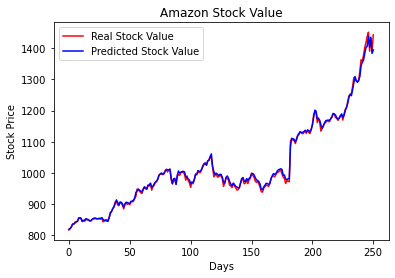

RMSE using RNN: 7.0769178123
Mean Absolute Error using RNN: 4.7541429312
Standard Deviation using RNN: 6.8437619629
Fold 11
Wall time: 1min 28s


In [20]:
%%time
print("Amazon (AMZN)")

# modify dataset
original = pd.read_csv('AMZN_data.csv', header = 0)
original['date']= pd.to_datetime(original['date'])
original['date']= pd.to_numeric(original['date'])
original.drop(['Name'], axis = 1, inplace = True)

# load dataset
dataset = original
values = dataset.values

# normalize dataset
s = MinMaxScaler(feature_range=(0, 1))
ndataset = s.fit_transform(values)

# convert series to supervised learning
pdataset = series_to_supervised(ndataset, 1, 1)

# drop columns we don't want to predict
pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
print(pdataset.head())
 
# split into 80% training set and 20% testing set
values = pdataset.values
train_len = (int)(len(original)*0.8)
train = values[:train_len, :]
test = values[train_len:, :]

# split into input and output sets
train_X = train[:, :6]
train_y = train[:, 5]
test_X = test[:, :6]
test_y = test[:, 5]

# reshape input to 3D
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# define RNN model
rnn = crossValidation(original, 20, 1)
 
# make a prediction
pred_y = rnn.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# inverse scaling
pred_y = concatenate((test_X[:, :5], pred_y), axis=1)
pred_y = s.inverse_transform(pred_y)
pred_y = pred_y[:,5]

# actual stock values
true_y = original.iloc[train_len:len(original)-1, 5]
true_y = true_y.reset_index(drop=True)

plot.plot(true_y, color = 'red', label = 'Real Stock Value')
plot.plot(pred_y, color = 'blue', label = 'Predicted Stock Value')
plot.title('Amazon Stock Value')
plot.xlabel('Days')
plot.ylabel('Stock Price')
plot.legend()
plot.show()

# Calculate Metrics
rmse = np.sqrt(metrics.mean_squared_error(true_y, pred_y))
mae = (metrics.mean_absolute_error(true_y, pred_y))

mean_a = statistics.mean(true_y)
mean_b = statistics.mean(pred_y)

stdev_a = statistics.stdev(true_y)
stdev_b = statistics.stdev(pred_y)

cov = 0
for i in range(len(true_y)):
    cov = cov + ((true_y[i]-mean_a)*(pred_y[i]-mean_b))/(len(true_y)-1)
    
cov = 2*cov

stdev = np.sqrt((stdev_a*stdev_a)+(stdev_b*stdev_b)-cov)

print('RMSE using RNN: %.10f' % rmse)
print('Mean Absolute Error using RNN: %.10f' % mae)
print('Standard Deviation using RNN: %.10f' % stdev)
print("Fold",fold)

In [10]:
%%time
print("Microsoft (MSFT)")

# modify dataset
original = pd.read_csv('MSFT_data.csv', header = 0)
original['date']= pd.to_datetime(original['date'])
original['date']= pd.to_numeric(original['date'])
original.drop(['Name'], axis = 1, inplace = True)

# load dataset
dataset = original
values = dataset.values

# normalize dataset
s = MinMaxScaler(feature_range=(0, 1))
ndataset = s.fit_transform(values)

# convert series to supervised learning
pdataset = series_to_supervised(ndataset, 1, 1)

# drop columns we don't want to predict
pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
print(pdataset.head())
 
# split into 80% training set and 20% testing set
values = pdataset.values
train_len = (int)(len(original)*0.8)
train = values[:train_len, :]
test = values[train_len:, :]

# split into input and output sets
train_X = train[:, :6]
train_y = train[:, 5]
test_X = test[:, :6]
test_y = test[:, 5]

# reshape input to 3D
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# define RNN model
rnn = crossValidation(original, 250, 1)
 
# make a prediction
pred_y = rnn.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# inverse scaling
pred_y = concatenate((test_X[:, :5], pred_y), axis=1)
pred_y = s.inverse_transform(pred_y)
pred_y = pred_y[:,5]

# actual stock values
true_y = original.iloc[train_len:len(original)-1, 5]
true_y = true_y.reset_index(drop=True)

plot.plot(true_y, color = 'red', label = 'Real Stock Value')
plot.plot(pred_y, color = 'blue', label = 'Predicted Stock Value')
plot.title('Microsoft Stock Value')
plot.xlabel('Days')
plot.ylabel('Stock Price')
plot.legend()
plot.show()

# Calculate Metrics
rmse = np.sqrt(metrics.mean_squared_error(true_y, pred_y))
mae = (metrics.mean_absolute_error(true_y, pred_y))

mean_a = statistics.mean(true_y)
mean_b = statistics.mean(pred_y)

stdev_a = statistics.stdev(true_y)
stdev_b = statistics.stdev(pred_y)

cov = 0
for i in range(len(true_y)):
    cov = cov + ((true_y[i]-mean_a)*(pred_y[i]-mean_b))/(len(true_y)-1)
    
cov = 2*cov

stdev = np.sqrt((stdev_a*stdev_a)+(stdev_b*stdev_b)-cov)

print('RMSE using RNN: %.10f' % rmse)
print('Mean Absolute Error using RNN: %.10f' % mae)
print('Standard Deviation using RNN: %.10f' % stdev)
print("Fold",fold)

Microsoft (MSFT)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var6(t)
1   0.000000   0.000000   0.001607   0.001203   0.107470   0.002661  0.007244
2   0.001644   0.004425   0.004674   0.004061   0.103026   0.007244  0.007540
3   0.002192   0.007818   0.005842   0.007821   0.118563   0.007540  0.009758
4   0.002740   0.008556   0.007449   0.009776   0.142324   0.009758  0.009905
5   0.003288   0.008408   0.006718   0.009626   0.104751   0.009905  0.009462
Fold 1
Epoch 1/100
4/4 [==============================] - 2s 2ms/step - loss: 0.3931
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3607
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3289
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2973
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2661
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2353
Epoch 7/100
4/4 [=======================

Epoch 98/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 99/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 100/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Fold 2
Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 0.4316
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3992
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3681
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3381
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3088
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2792
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2491
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2181
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1860
Epoch 10/100
4/4 [==============================] - 0

4/4 [==============================] - 2s 2ms/step - loss: 0.3745
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3409
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3085
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2769
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2453
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2131
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1806
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1492
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1200
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0937
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0711
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0578
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 0

4/4 [==============================] - 0s 2ms/step - loss: 0.2588
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2318
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2042
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1760
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1480
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1218
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0985
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0803
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0684
Epoch 13/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0634
Epoch 14/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0702
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0826
Epoch 16/100
4/4 [==============================] - 0s 2ms/step - loss

4/4 [==============================] - 0s 3ms/step - loss: 0.1587
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1291
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1021
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0799
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0624
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0713
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0832
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0863
Epoch 16/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0792
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0699
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0619
Epoch 19/100
4/4 [==============================] - 0s 3ms/step - l

Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0974
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0813
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0722
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0705
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0772
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0864
Epoch 16/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0886
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0821
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0733
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0608
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 22/100
4/4 [==============================] - 

4/4 [==============================] - 0s 2ms/step - loss: 0.0770
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0876
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0975
Epoch 16/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0958
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0862
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0762
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0600
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0577
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0535
Epoch 25/100
4/4 [==============================] - 0s 2ms/step -

4/4 [==============================] - 0s 2ms/step - loss: 0.0837
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0767
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0692
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0504
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0477
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0453
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0430
Epoch 26/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 27/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0378
Epoch 28/100
4/4 [==============================] - 0s 2ms/step -

4/4 [==============================] - 0s 3ms/step - loss: 0.0842
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0761
Epoch 21/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0691
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0638
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 24/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0569
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 26/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0524
Epoch 27/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0501
Epoch 28/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0472
Epoch 29/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0435
Epoch 30/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0396
Epoch 31/100
4/4 [==============================] - 0s 2ms/step -

4/4 [==============================] - 0s 3ms/step - loss: 0.0443
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0373
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0347
Epoch 26/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 27/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 28/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 29/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 30/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 31/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 32/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 33/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0211
Epoch 34/100
4/4 [==============================] - 0s 2ms/step -

5/5 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 26/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0193
Epoch 27/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 28/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 29/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 30/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 31/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 32/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 33/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 34/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 35/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 36/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 37/100
5/5 [==============================] - 0s 2ms/step -

RMSE using RNN: 0.4297059387
Mean Absolute Error using RNN: 0.2983925308
Standard Deviation using RNN: 0.3882274266
Fold 11
Wall time: 35.6 s


In [19]:
%%time
print("Walmart (WMT)")

# modify dataset
original = pd.read_csv('WMT_data.csv', header = 0)
original['date']= pd.to_datetime(original['date'])
original['date']= pd.to_numeric(original['date'])
original.drop(['Name'], axis = 1, inplace = True)

# load dataset
dataset = original
values = dataset.values

# normalize dataset
s = MinMaxScaler(feature_range=(0, 1))
ndataset = s.fit_transform(values)

# convert series to supervised learning
pdataset = series_to_supervised(ndataset, 1, 1)

# drop columns we don't want to predict
pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
print(pdataset.head())
 
# split into 80% training set and 20% testing set
values = pdataset.values
train_len = (int)(len(original)*0.8)
train = values[:train_len, :]
test = values[train_len:, :]

# split into input and output sets
train_X = train[:, :6]
train_y = train[:, 5]
test_X = test[:, :6]
test_y = test[:, 5]

# reshape input to 3D
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# define RNN model
rnn = crossValidation(original, 100, 1)
 
# make a prediction
pred_y = rnn.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# inverse scaling
pred_y = concatenate((test_X[:, :5], pred_y), axis=1)
pred_y = s.inverse_transform(pred_y)
pred_y = pred_y[:,5]

# actual stock values
true_y = original.iloc[train_len:len(original)-1, 5]
true_y = true_y.reset_index(drop=True)

plot.plot(true_y, color = 'red', label = 'Real Stock Value')
plot.plot(pred_y, color = 'blue', label = 'Predicted Stock Value')
plot.title('Walmart Stock Value')
plot.xlabel('Days')
plot.ylabel('Stock Price')
plot.legend()
plot.show()

# Calculate Metrics
rmse = np.sqrt(metrics.mean_squared_error(true_y, pred_y))
mae = (metrics.mean_absolute_error(true_y, pred_y))

mean_a = statistics.mean(true_y)
mean_b = statistics.mean(pred_y)

stdev_a = statistics.stdev(true_y)
stdev_b = statistics.stdev(pred_y)

cov = 0
for i in range(len(true_y)):
    cov = cov + ((true_y[i]-mean_a)*(pred_y[i]-mean_b))/(len(true_y)-1)
    
cov = 2*cov

stdev = np.sqrt((stdev_a*stdev_a)+(stdev_b*stdev_b)-cov)

print('RMSE using RNN: %.10f' % rmse)
print('Mean Absolute Error using RNN: %.10f' % mae)
print('Standard Deviation using RNN: %.10f' % stdev)
print("Fold",fold)

Walmart (WMT)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var6(t)
1   0.000000   0.280758   0.275510   0.285742   0.048372   0.283456  0.281950
2   0.001644   0.281706   0.273054   0.275295   0.052125   0.281950  0.281950
3   0.002192   0.286256   0.275888   0.286322   0.033843   0.281950  0.281762
4   0.002740   0.282464   0.276644   0.288450   0.023792   0.281762  0.271033
5   0.003288   0.278863   0.267763   0.279648   0.059972   0.271033  0.242424
Fold 1
Epoch 1/100
9/9 [==============================] - 2s 2ms/step - loss: 0.5829
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.4967
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.4128
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.3272
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2385
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1643
Epoch 7/100
9/9 [==========================

9/9 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 99/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 100/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0070
Fold 2
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.5315
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4269
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3237
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2187
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1325
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0755
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0467
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0374
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 10/100
10/10 [============================

10/10 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0131
Fold 3
Epoch 1/100
10/10 [==============================] - 2s 2ms/step - loss: 0.5472
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4456
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3457
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2448
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1621
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1063
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0749
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0423
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0375
Epoch 11/100
10/10 [======================

10/10 [==============================] - 0s 2ms/step - loss: 0.0079
Fold 4
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.5406
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4456
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3506
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2516
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1617
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0981
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0429
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0377
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0307
Epoch 12/100
10/10 [=======================

10/10 [==============================] - 1s 2ms/step - loss: 0.6009
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5067
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4140
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3168
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2261
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1583
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1122
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0840
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0647
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0501
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 13/100
10/10 [=============================

10/10 [==============================] - 0s 2ms/step - loss: 0.4568
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3612
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2661
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1874
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1325
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0980
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0733
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0537
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0418
Epoch 11/100
10/10 [==============================] - ETA: 0s - loss: 0.026 - 0s 2ms/step - loss: 0.0385
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0331
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 14/100
10/10 [====

10/10 [==============================] - 0s 2ms/step - loss: 0.3309
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2314
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1468
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0849
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0469
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0382
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0393
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0328
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 15/100
10/10 [===========================

10/10 [==============================] - 0s 2ms/step - loss: 0.2327
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1273
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0519
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0348
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0328
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0215
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 14/100
10/10 [==============================] - ETA: 0s - loss: 0.021 - 0s 2ms/step - loss: 0.0168
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 16/100
10/10 [==

10/10 [==============================] - 0s 2ms/step - loss: 0.3085
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2098
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1221
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0383
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0361
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0356
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0274
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0214
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 16/100
10/10 [==========================

9/9 [==============================] - 0s 2ms/step - loss: 0.2521
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1621
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0829
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0442
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0386
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0422
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0372
Epoch 12/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 13/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 14/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0258
Epoch 15/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 16/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 17/100
9/9 [==============================] - ETA: 0s - loss: 0

11/11 [==============================] - 0s 2ms/step - loss: 0.0302
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0242
Epoch 11/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 12/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 13/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 14/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 15/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 16/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 17/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 18/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 19/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 20/100
11/11 [======================

RMSE using RNN: 0.4849922909
Mean Absolute Error using RNN: 0.3289323360
Standard Deviation using RNN: 0.4621775715
Fold 3
Wall time: 44.1 s


In [12]:
%%time
print("Ford (F)")

# modify dataset
original = pd.read_csv('F_data.csv', header = 0)
original['date']= pd.to_datetime(original['date'])
original['date']= pd.to_numeric(original['date'])
original.drop(['Name'], axis = 1, inplace = True)

# load dataset
dataset = original
values = dataset.values

# normalize dataset
s = MinMaxScaler(feature_range=(0, 1))
ndataset = s.fit_transform(values)

# convert series to supervised learning
pdataset = series_to_supervised(ndataset, 1, 1)

# drop columns we don't want to predict
pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
print(pdataset.head())
 
# split into 80% training set and 20% testing set
values = pdataset.values
train_len = (int)(len(original)*0.8)
train = values[:train_len, :]
test = values[train_len:, :]

# split into input and output sets
train_X = train[:, :6]
train_y = train[:, 5]
test_X = test[:, :6]
test_y = test[:, 5]

# reshape input to 3D
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# define RNN model
rnn = crossValidation(original, 100, 1)
 
# make a prediction
pred_y = rnn.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# inverse scaling
pred_y = concatenate((test_X[:, :5], pred_y), axis=1)
pred_y = s.inverse_transform(pred_y)
pred_y = pred_y[:,5]

# actual stock values
true_y = original.iloc[train_len:len(original)-1, 5]
true_y = true_y.reset_index(drop=True)

plot.plot(true_y, color = 'red', label = 'Real Stock Value')
plot.plot(pred_y, color = 'blue', label = 'Predicted Stock Value')
plot.title('Ford Stock Value')
plot.xlabel('Days')
plot.ylabel('Stock Price')
plot.legend()
plot.show()

# Calculate Metrics
rmse = np.sqrt(metrics.mean_squared_error(true_y, pred_y))
mae = (metrics.mean_absolute_error(true_y, pred_y))

mean_a = statistics.mean(true_y)
mean_b = statistics.mean(pred_y)

stdev_a = statistics.stdev(true_y)
stdev_b = statistics.stdev(pred_y)

cov = 0
for i in range(len(true_y)):
    cov = cov + ((true_y[i]-mean_a)*(pred_y[i]-mean_b))/(len(true_y)-1)
    
cov = 2*cov

stdev = np.sqrt((stdev_a*stdev_a)+(stdev_b*stdev_b)-cov)

print('RMSE using RNN: %.10f' % rmse)
print('Mean Absolute Error using RNN: %.10f' % mae)
print('Standard Deviation using RNN: %.10f' % stdev)
print("Fold",fold)

Ford (F)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var6(t)
1   0.000000   0.365633   0.337784   0.376812   0.053778   0.376316  0.377632
2   0.001644   0.360465   0.343124   0.372859   0.049508   0.377632  0.373684
3   0.002192   0.368217   0.343124   0.376812   0.089584   0.373684  0.368421
4   0.002740   0.366925   0.335113   0.368906   0.081470   0.368421  0.377632
5   0.003288   0.352713   0.339119   0.364954   0.123614   0.377632  0.365789
Fold 1
Epoch 1/100
9/9 [==============================] - 1s 2ms/step - loss: 0.5450
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.4675
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.3914
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.3187
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2522
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1920
Epoch 7/100
9/9 [==============================]

9/9 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 99/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 100/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0111
Fold 2
Epoch 1/100
10/10 [==============================] - 2s 2ms/step - loss: 0.5583
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4563
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3569
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2634
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1822
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1219
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0850
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0651
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0555
Epoch 10/100
10/10 [============================

10/10 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0102
Fold 3
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.5496
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4488
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3598
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2820
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2132
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1550
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1115
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0860
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0703
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0601
Epoch 11/100
10/10 [======================

10/10 [==============================] - 0s 2ms/step - loss: 0.0102
Fold 4
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.5833
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4811
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3824
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2913
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2131
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1498
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1061
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0798
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0656
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 12/100
10/10 [=======================

10/10 [==============================] - 1s 2ms/step - loss: 0.5117
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4001
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2993
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2117
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1432
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0956
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0431
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0359
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0247
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 13/100
10/10 [=============================

10/10 [==============================] - 0s 2ms/step - loss: 0.4871
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3903
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2970
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2127
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1447
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0984
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0719
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0475
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0395
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 14/100
10/10 [============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3259
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2355
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1581
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0981
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0591
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0446
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0387
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0319
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0212
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 15/100
10/10 [===========================

10/10 [==============================] - 0s 2ms/step - loss: 0.2552
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1759
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1113
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0744
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0591
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0394
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0294
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 16/100
10/10 [==========================

10/10 [==============================] - 0s 2ms/step - loss: 0.2961
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2078
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1297
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0798
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0592
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0511
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0420
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0327
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0267
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 16/100
10/10 [==========================

9/9 [==============================] - 0s 2ms/step - loss: 0.2513
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1631
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1038
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0757
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 12/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 13/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0510
Epoch 14/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0450
Epoch 15/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 16/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 17/100
9/9 [==============================] - 0s 2ms/step - los

11/11 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0496
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0408
Epoch 11/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0312
Epoch 12/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 13/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 14/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 15/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 16/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 17/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 18/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 19/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 20/100
11/11 [======================

RMSE using RNN: 0.0654530281
Mean Absolute Error using RNN: 0.0507277317
Standard Deviation using RNN: 0.0590387486
Fold 11
Wall time: 44.1 s


Alphabet (GOOGL)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var6(t)
1   0.000000   0.006837   0.004411   0.011405   0.243547   0.012108  0.010272
2   0.001644   0.005759   0.002137   0.007784   0.168388   0.010272  0.009202
3   0.002192   0.007847   0.005173   0.011287   0.141133   0.009202  0.010546
4   0.002740   0.006837   0.003593   0.011661   0.082779   0.010546  0.013633
5   0.003288   0.006588   0.005694   0.010290   0.130207   0.013633  0.016788
Fold 1
Epoch 1/100
5/5 [==============================] - 2s 2ms/step - loss: 0.3079
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2707
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2342
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1977
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1628
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1343
Epoch 7/100
5/5 [=======================

5/5 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 99/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 100/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0083
Fold 2
Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 0.3712
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3270
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2841
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2431
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2031
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1640
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1260
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0874
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0620
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - 

5/5 [==============================] - 2s 2ms/step - loss: 0.3542
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3167
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2803
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2451
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2105
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1763
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1476
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1223
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0978
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0833
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0815
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0893
Epoch 13/100
5/5 [==============================] - 0s 2ms/step - loss: 0

5/5 [==============================] - 0s 2ms/step - loss: 0.2241
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1897
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1559
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1272
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1028
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0801
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0703
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0708
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0809
Epoch 13/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0902
Epoch 14/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0833
Epoch 15/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 16/100
5/5 [==============================] - 0s 2ms/step - loss

5/5 [==============================] - 0s 2ms/step - loss: 0.1533
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1056
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0843
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0744
Epoch 13/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0874
Epoch 14/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0906
Epoch 15/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0815
Epoch 16/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0715
Epoch 17/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0650
Epoch 18/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 19/100
5/5 [==============================] - 0s 2ms/step - l

5/5 [==============================] - 0s 2ms/step - loss: 0.0941
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0805
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0817
Epoch 13/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0958
Epoch 14/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1028
Epoch 15/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0931
Epoch 16/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0809
Epoch 17/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0725
Epoch 18/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 19/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0642
Epoch 20/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0619
Epoch 21/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0574
Epoch 22/100
5/5 [==============================] - 0s 2ms/step -

5/5 [==============================] - 0s 2ms/step - loss: 0.1013
Epoch 14/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0914
Epoch 15/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0805
Epoch 16/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0720
Epoch 17/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 18/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 19/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 20/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 21/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0440
Epoch 22/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0385
Epoch 23/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0342
Epoch 24/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 25/100
5/5 [==============================] - 0s 2ms/step -

5/5 [==============================] - 0s 2ms/step - loss: 0.0899
Epoch 17/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0807
Epoch 18/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0717
Epoch 19/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0644
Epoch 20/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0587
Epoch 21/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 22/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0510
Epoch 23/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 24/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0428
Epoch 25/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0386
Epoch 26/100
5/5 [==============================] - ETA: 0s - loss: 0.051 - 0s 2ms/step - loss: 0.0349
Epoch 27/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0321
Epoch 28/100
5/5 [=======================

5/5 [==============================] - 0s 3ms/step - loss: 0.0452
Epoch 20/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0410
Epoch 21/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0371
Epoch 22/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0345
Epoch 23/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0324
Epoch 24/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 25/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0289
Epoch 26/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0278
Epoch 27/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 28/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0260
Epoch 29/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 30/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0245
Epoch 31/100
5/5 [==============================] - 0s 2ms/step -

5/5 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 23/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 24/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0441
Epoch 25/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0417
Epoch 26/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0393
Epoch 27/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0370
Epoch 28/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0348
Epoch 29/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0330
Epoch 30/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0316
Epoch 31/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0303
Epoch 32/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 33/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 34/100
5/5 [==============================] - 0s 2ms/step -

6/6 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 26/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 27/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 28/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 29/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 30/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 31/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 32/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 33/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 34/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 35/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 36/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 37/100
6/6 [==============================] - 0s 4ms/step -

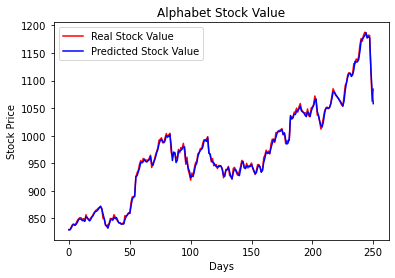

RMSE using RNN: 4.4437215556
Mean Absolute Error using RNN: 3.2583793727
Standard Deviation using RNN: 4.1608806265
Fold 7
Wall time: 37.3 s


In [13]:
%%time
print("Alphabet (GOOGL)")

# modify dataset
original = pd.read_csv('GOOGL_data.csv', header = 0)
original['date']= pd.to_datetime(original['date'])
original['date']= pd.to_numeric(original['date'])
original.drop(['Name'], axis = 1, inplace = True)

# load dataset
dataset = original
values = dataset.values

# normalize dataset
s = MinMaxScaler(feature_range=(0, 1))
ndataset = s.fit_transform(values)

# convert series to supervised learning
pdataset = series_to_supervised(ndataset, 1, 1)

# drop columns we don't want to predict
pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
print(pdataset.head())
 
# split into 80% training set and 20% testing set
values = pdataset.values
train_len = (int)(len(original)*0.8)
train = values[:train_len, :]
test = values[train_len:, :]

# split into input and output sets
train_X = train[:, :6]
train_y = train[:, 5]
test_X = test[:, :6]
test_y = test[:, 5]

# reshape input to 3D
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# define RNN model
rnn = crossValidation(original, 200, 1)
 
# make a prediction
pred_y = rnn.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# inverse scaling
pred_y = concatenate((test_X[:, :5], pred_y), axis=1)
pred_y = s.inverse_transform(pred_y)
pred_y = pred_y[:,5]

# actual stock values
true_y = original.iloc[train_len:len(original)-1, 5]
true_y = true_y.reset_index(drop=True)

plot.plot(true_y, color = 'red', label = 'Real Stock Value')
plot.plot(pred_y, color = 'blue', label = 'Predicted Stock Value')
plot.title('Alphabet Stock Value')
plot.xlabel('Days')
plot.ylabel('Stock Price')
plot.legend()
plot.show()

# Calculate Metrics
rmse = np.sqrt(metrics.mean_squared_error(true_y, pred_y))
mae = (metrics.mean_absolute_error(true_y, pred_y))

mean_a = statistics.mean(true_y)
mean_b = statistics.mean(pred_y)

stdev_a = statistics.stdev(true_y)
stdev_b = statistics.stdev(pred_y)

cov = 0
for i in range(len(true_y)):
    cov = cov + ((true_y[i]-mean_a)*(pred_y[i]-mean_b))/(len(true_y)-1)
    
cov = 2*cov

stdev = np.sqrt((stdev_a*stdev_a)+(stdev_b*stdev_b)-cov)

print('RMSE using RNN: %.10f' % rmse)
print('Mean Absolute Error using RNN: %.10f' % mae)
print('Standard Deviation using RNN: %.10f' % stdev)
print("Fold",fold)

IBM (IBM)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var6(t)
1   0.000000   0.841003   0.856505   0.849896   0.058034   0.855845  0.840327
2   0.001644   0.851424   0.855050   0.850614   0.059788   0.840327  0.839102
3   0.002192   0.841416   0.842425   0.843120   0.043306   0.839102  0.839612
4   0.002740   0.848019   0.844659   0.848766   0.033339   0.839612  0.835120
5   0.003288   0.838527   0.838113   0.845584   0.071717   0.835120  0.848698
Fold 1
Epoch 1/100
9/9 [==============================] - 1s 2ms/step - loss: 0.6717
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5692
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.4652
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.3560
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2474
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1619
Epoch 7/100
9/9 [==============================

9/9 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 99/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 100/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0107
Fold 2
Epoch 1/100
10/10 [==============================] - 2s 2ms/step - loss: 0.6636
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5493
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4330
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3178
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2223
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1566
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1339
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1286
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1256
Epoch 10/100
10/10 [============================

10/10 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 100/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0093
Fold 3
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.6561
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5488
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4391
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3215
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2039
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1202
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0778
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 11/100
10/10 [======================

10/10 [==============================] - 0s 2ms/step - loss: 0.0102
Fold 4
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.5528
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4385
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3259
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2277
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1570
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1231
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1126
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1129
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1065
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0842
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 12/100
10/10 [=======================

10/10 [==============================] - 1s 2ms/step - loss: 0.5230
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2745
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1669
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0936
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0628
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0446
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 13/100
10/10 [=============================

10/10 [==============================] - 0s 2ms/step - loss: 0.4745
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3505
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2277
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1342
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0738
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0540
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0526
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0495
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0339
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 14/100
10/10 [============================

10/10 [==============================] - 0s 2ms/step - loss: 0.4326
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3098
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1920
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1077
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0631
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0497
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0316
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 15/100
10/10 [===========================

10/10 [==============================] - 0s 2ms/step - loss: 0.2436
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1766
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1413
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1198
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1032
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0880
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0394
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 16/100
10/10 [==========================

10/10 [==============================] - 0s 2ms/step - loss: 0.2348
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1493
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1062
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0852
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0730
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0460
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 14/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0188
Epoch 15/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0200
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 17/100
10/10 [=========================

9/9 [==============================] - 0s 2ms/step - loss: 0.1726
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1192
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0838
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0634
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 12/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0435
Epoch 13/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 14/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 15/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 16/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 17/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 18/100
9/9 [==============================] - 0s 2ms/step - lo

11/11 [==============================] - 0s 2ms/step - loss: 0.0889
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0844
Epoch 11/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0756
Epoch 12/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 13/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0419
Epoch 14/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 15/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 16/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 17/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 18/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 19/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 20/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 21/100
11/11 [=====================

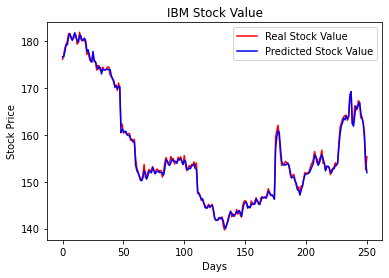

RMSE using RNN: 0.6316226871
Mean Absolute Error using RNN: 0.4665834779
Standard Deviation using RNN: 0.6116152101
Fold 11
Wall time: 45.9 s


In [18]:
%%time
print("IBM (IBM)")

# modify dataset
original = pd.read_csv('IBM_data.csv', header = 0)
original['date']= pd.to_datetime(original['date'])
original['date']= pd.to_numeric(original['date'])
original.drop(['Name'], axis = 1, inplace = True)

# load dataset
dataset = original
values = dataset.values

# normalize dataset
s = MinMaxScaler(feature_range=(0, 1))
ndataset = s.fit_transform(values)

# convert series to supervised learning
pdataset = series_to_supervised(ndataset, 1, 1)

# drop columns we don't want to predict
pdataset.drop(pdataset.columns[[6,7,8,9,10]], axis=1, inplace=True)
print(pdataset.head())
 
# split into 80% training set and 20% testing set
values = pdataset.values
train_len = (int)(len(original)*0.8)
train = values[:train_len, :]
test = values[train_len:, :]

# split into input and output sets
train_X = train[:, :6]
train_y = train[:, 5]
test_X = test[:, :6]
test_y = test[:, 5]

# reshape input to 3D
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# define RNN model
rnn = crossValidation(original, 100, 1)
 
# make a prediction
pred_y = rnn.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# inverse scaling
pred_y = concatenate((test_X[:, :5], pred_y), axis=1)
pred_y = s.inverse_transform(pred_y)
pred_y = pred_y[:,5]

# actual stock values
true_y = original.iloc[train_len:len(original)-1, 5]
true_y = true_y.reset_index(drop=True)

plot.plot(true_y, color = 'red', label = 'Real Stock Value')
plot.plot(pred_y, color = 'blue', label = 'Predicted Stock Value')
plot.title('IBM Stock Value')
plot.xlabel('Days')
plot.ylabel('Stock Price')
plot.legend()
plot.show()

# Calculate Metrics
rmse = np.sqrt(metrics.mean_squared_error(true_y, pred_y))
mae = (metrics.mean_absolute_error(true_y, pred_y))

mean_a = statistics.mean(true_y)
mean_b = statistics.mean(pred_y)

stdev_a = statistics.stdev(true_y)
stdev_b = statistics.stdev(pred_y)

cov = 0
for i in range(len(true_y)):
    cov = cov + ((true_y[i]-mean_a)*(pred_y[i]-mean_b))/(len(true_y)-1)
    
cov = 2*cov

stdev = np.sqrt((stdev_a*stdev_a)+(stdev_b*stdev_b)-cov)

print('RMSE using RNN: %.10f' % rmse)
print('Mean Absolute Error using RNN: %.10f' % mae)
print('Standard Deviation using RNN: %.10f' % stdev)
print("Fold",fold)